# Task 6.6 Sourcing and Analyzing Time series

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = r'C:\Users\TEDWI\OneDrive\Project 6'

In [3]:
Store = pd.read_pickle(os.path.join(path, 'df_store_new.pkl'))

In [4]:
# This option ensures charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## Step 3

In [5]:
# removing columns that are not datetime and quatitative
Store = Store.drop(columns = ['Row ID', 'Order ID','Postal Code', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment','Country',
           'City', 'State', 'Product ID', 'Category', 'Sub-Category', 'Product Name'], axis=1)

In [6]:
Store.head()

,Order Date,Sales
0,08/11/2017,261.9600
1,08/11/2017,731.9400
2,12/06/2017,14.6200
3,11/10/2016,957.5775
4,11/10/2016,22.3680


In [7]:
# changing order date from object to date time
Store['Order Date'] = Store['Order Date'].astype('datetime64[ns]')

In [8]:
Store['Order Date'] = pd.to_datetime(Store['Order Date'])

In [9]:
Store.head()

,Order Date,Sales
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680


In [10]:
type(Store)

pandas.core.frame.DataFrame

In [11]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9789 non-null   datetime64[ns]
 1   Sales       9789 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 229.4 KB


In [12]:
Store.head()

,Order Date,Sales
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680


In [13]:
# setting index as order date 
Store= Store.set_index('Order Date')

In [14]:
Store.dtypes

Sales    float64
dtype: object

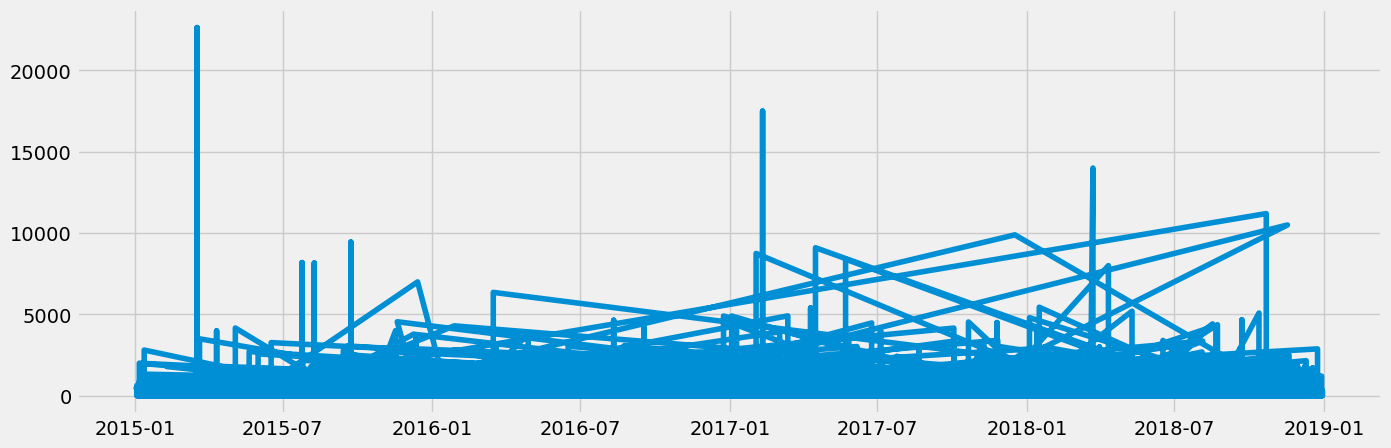

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(Store)

# Second Technique

<Axes: xlabel='Order Date', ylabel='Sales'>

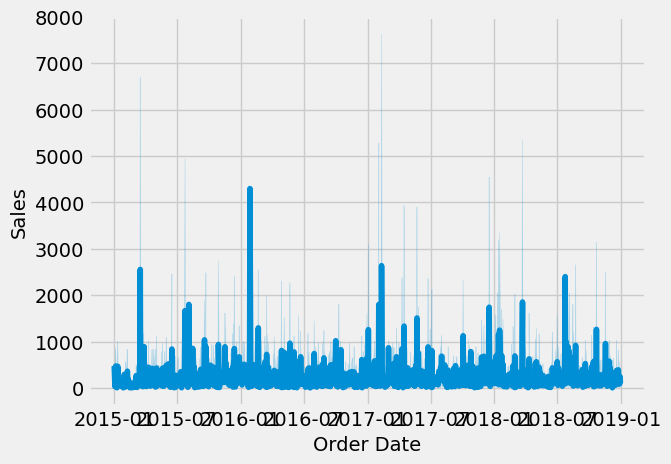

In [16]:
# Plot the data using matplotlib.
sorted_time_series_sales = Store.groupby(['Order Date']).sum()
# sorted_time_series_sales.head(12)
daily_sales = sns.lineplot(Store, x='Order Date', y='Sales')
daily_sales

In [17]:
# Reset index so that you can use the "Date" column as a filter

Store_2 = Store.reset_index()

In [18]:
Store_2.head()

,Order Date,Sales
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680


In [19]:
#creating a subset in the data
Store_sub = Store_2.loc[(Store_2['Order Date'] >= '2017-08-11') & (Store_2['Order Date'] < '2018-01-01')]

## This subset was chosen because 2017-2018 gives a clearer view of the fluctuations of the sales rather than the entire data set which makes it hard to pick up on trends.

In [20]:
Store_sub.shape

(1156, 2)

In [21]:
Store.shape

(9789, 1)

In [22]:
# Set the "Date" column as the index

from datetime import datetime

Store_sub['datetime'] = pd.to_datetime(Store_sub['Order Date']) # Create a datetime column from "Date.""
Store_sub = Store_sub.set_index('Order Date') # SetOrde the datetime as the index of the dataframe.
Store_sub.drop(['datetime'], axis=1, inplace=True) # Drop the "Date" column.
Store_sub.head()

,Sales
Order Date,
2017-08-11,261.96
2017-08-11,731.94
2017-12-06,14.62
2017-09-12,19.46
2017-09-12,60.34


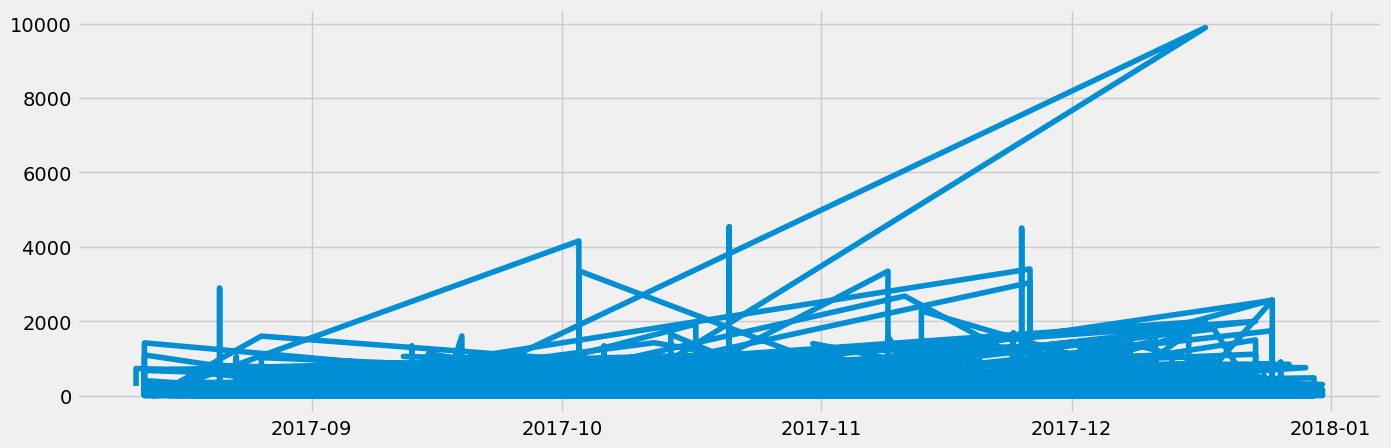

In [23]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Store_sub)

# Second technique for Subset

<Axes: xlabel='Order Date', ylabel='Sales'>

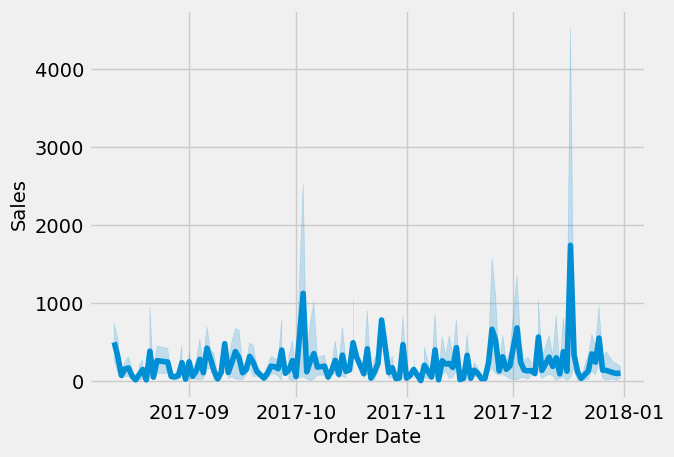

In [24]:
new_sorted_time_series_sales = Store_sub.groupby(['Order Date']).sum()
# sorted_time_series_sales.head(12)
daily_sales = sns.lineplot(Store_sub, x='Order Date', y='Sales')
daily_sales

In [25]:
# Check for missing values (you shouldn't have any)

Store_sub.isnull().sum() 

Sales    0
dtype: int64

In [26]:
# Check for duplicates

dups = Store_sub.duplicated()
dups.sum()

# No dups!

124

In [27]:
#Remove duplicates
Store_sub.drop_duplicates()


,Sales
Order Date,
2017-08-11,261.960
2017-08-11,731.940
2017-12-06,14.620
2017-09-12,19.460
2017-09-12,60.340
...,...
2017-11-10,27.720
2017-10-31,1403.920
2017-11-24,339.920


# Time Series Decomposition

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


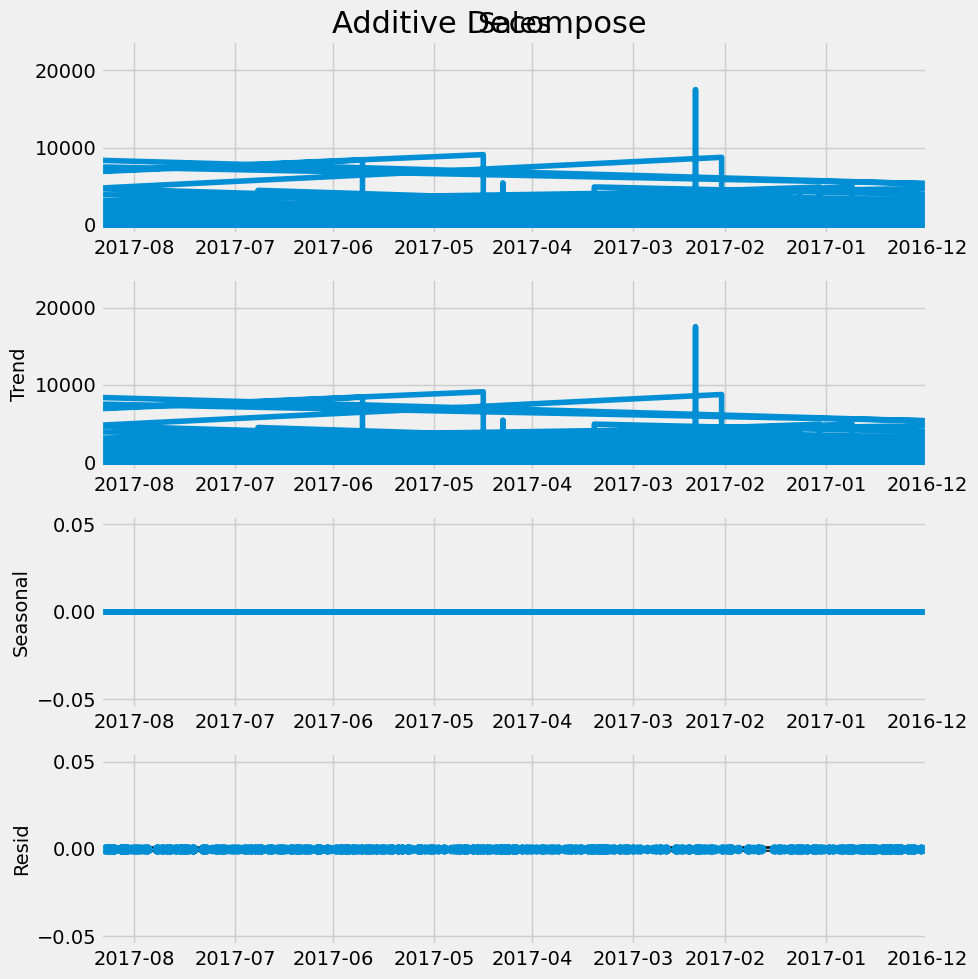

In [29]:
result_add = seasonal_decompose(x=Store['Sales'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

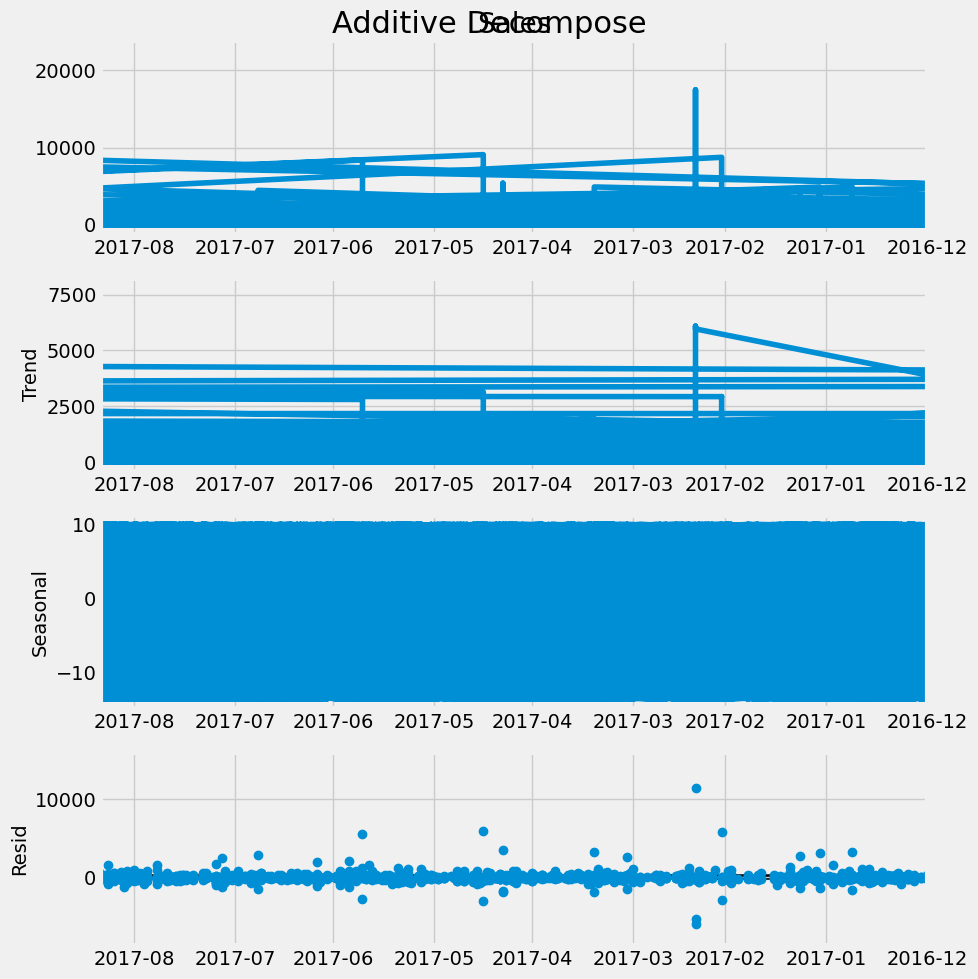

In [30]:
result_add = seasonal_decompose(x=Store['Sales'], model='additive', extrapolate_trend='freq', period=3)
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

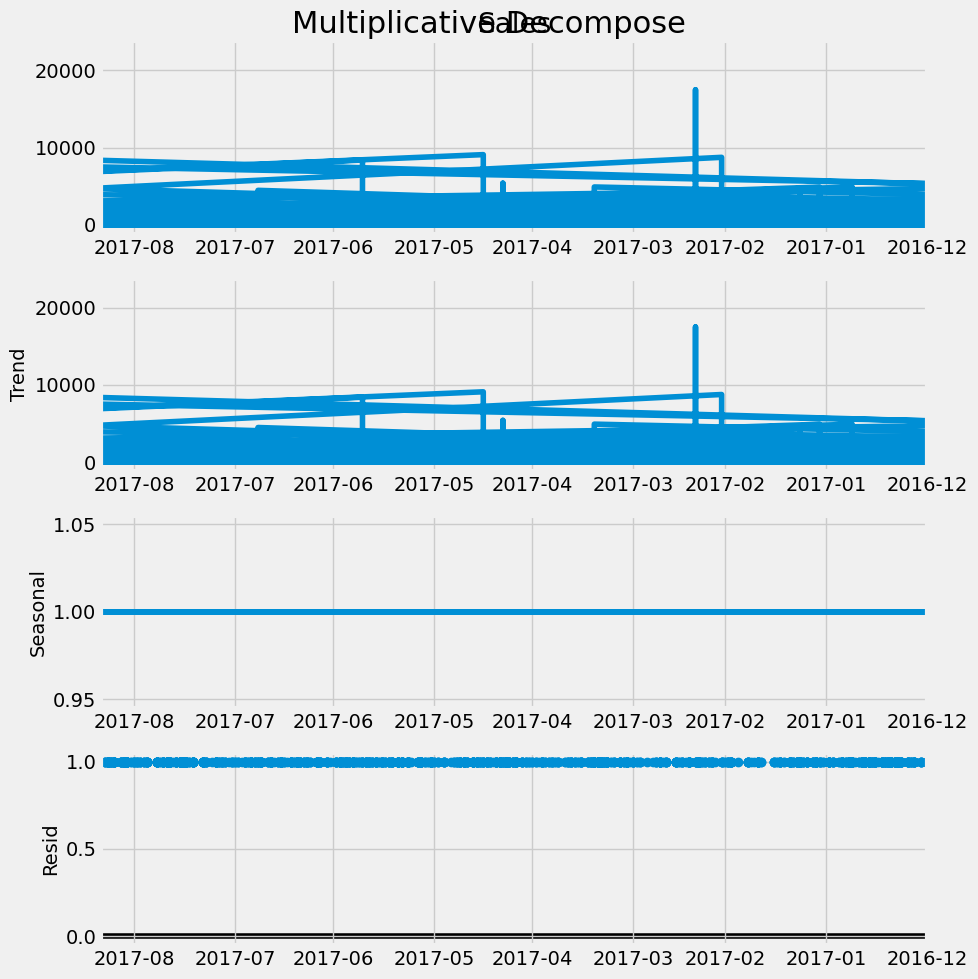

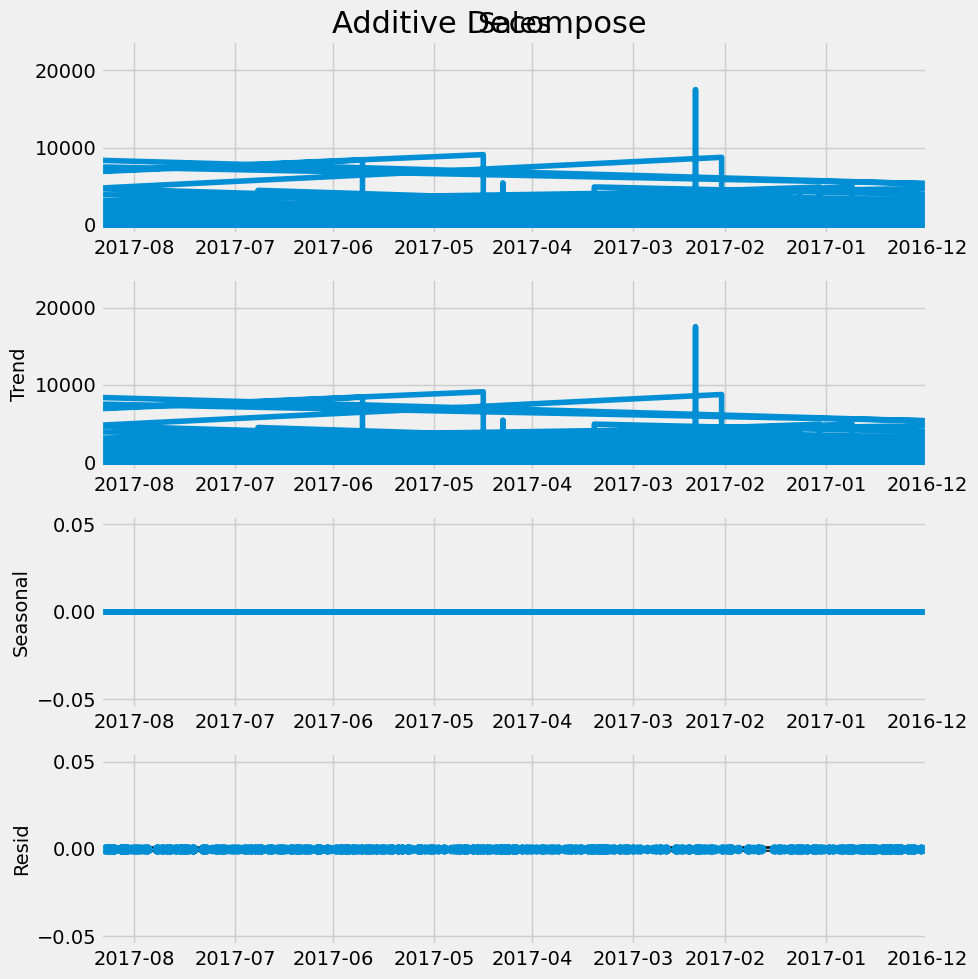

In [31]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(Store['Sales'], model='multiplicative', extrapolate_trend='freq', period=1)

# Additive Decomposition
result_add = seasonal_decompose(Store['Sales'], model='additive', extrapolate_trend='freq', period=1)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

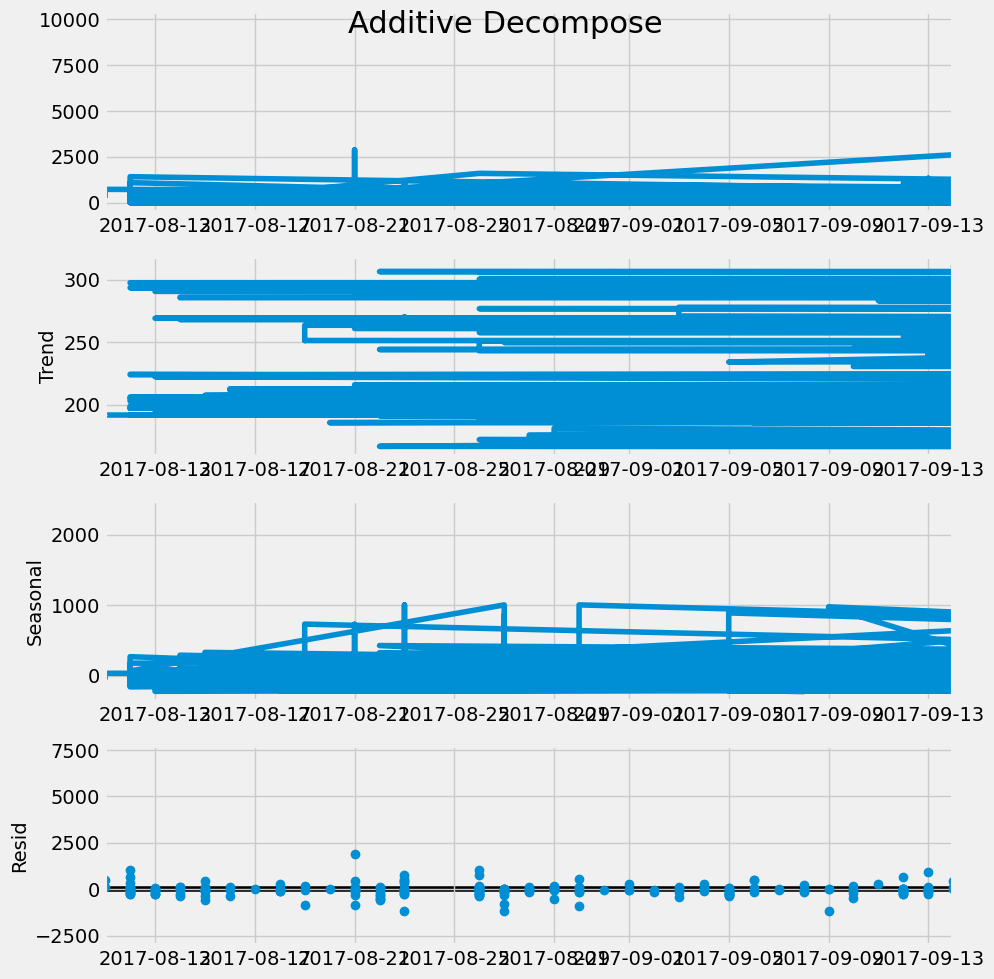

In [32]:
result_add = seasonal_decompose(x=Store_sub, model='additive', extrapolate_trend='freq', period=int(len(Store_sub)/4))
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [33]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(x=Store_sub, model='additive',period=1)

In [34]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

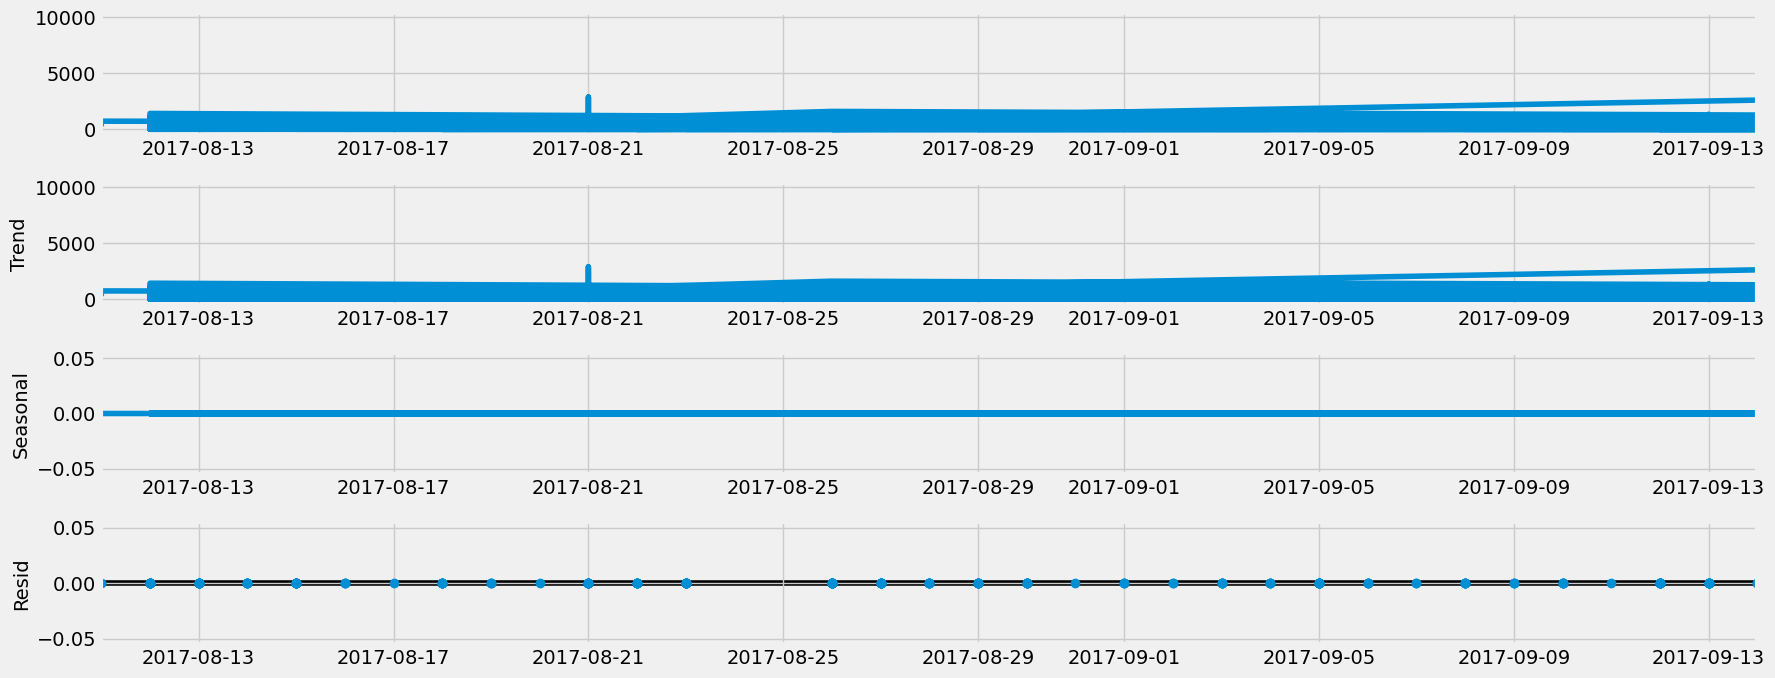

In [35]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for stationarity

In [36]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(Store_sub['Sales'])

Dickey-Fuller Stationarity test:
Test Statistic                  -34.551061
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    1155.000000
Critical Value (1%)              -3.436024
Critical Value (5%)              -2.864046
Critical Value (10%)             -2.568104
dtype: float64


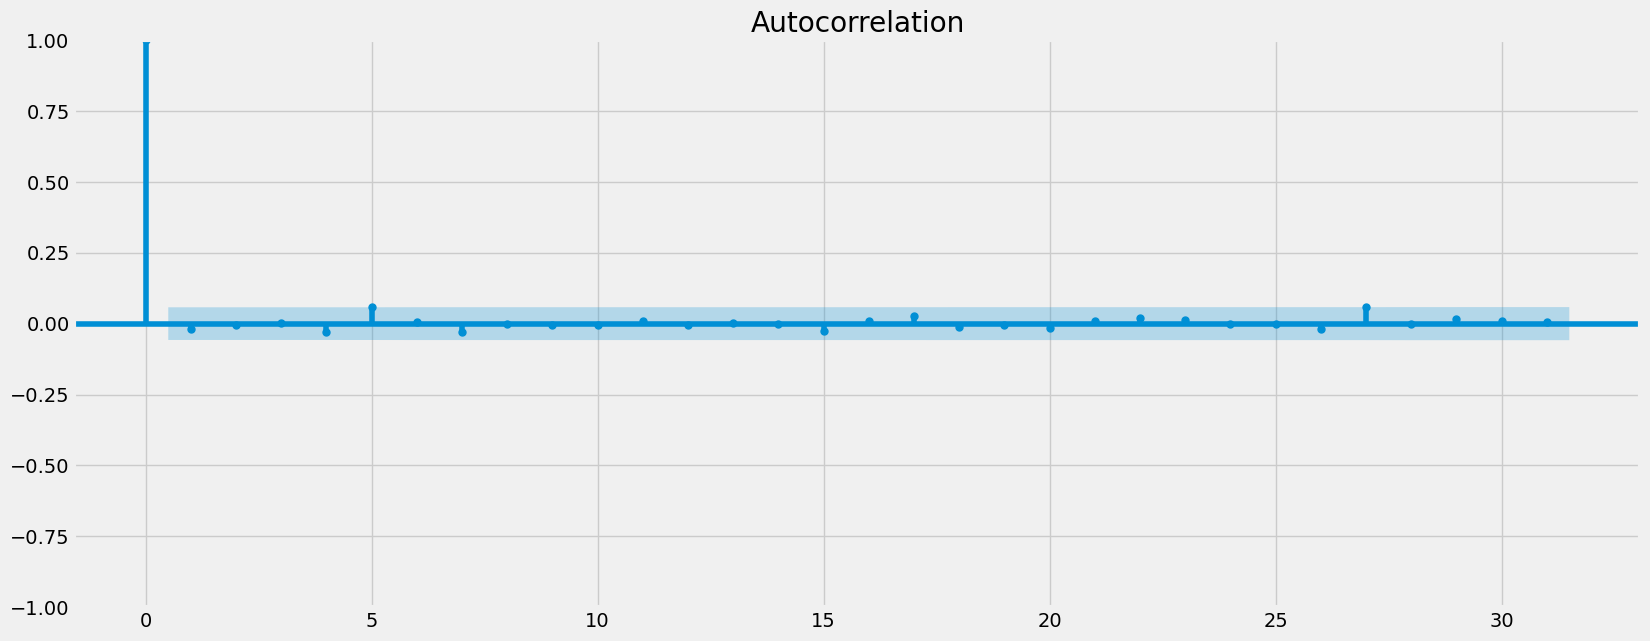

In [37]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(Store_sub)
plt.show()

# Stationarizing Economic Data

In [38]:
data_diff = Store_sub - Store_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [39]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [40]:
data_diff.head()

,Sales
Order Date,
2017-08-11,469.980
2017-12-06,-717.320
2017-09-12,4.840
2017-09-12,40.880
2017-08-12,1037.204


In [41]:
data_diff.columns

Index(['Sales'], dtype='object')

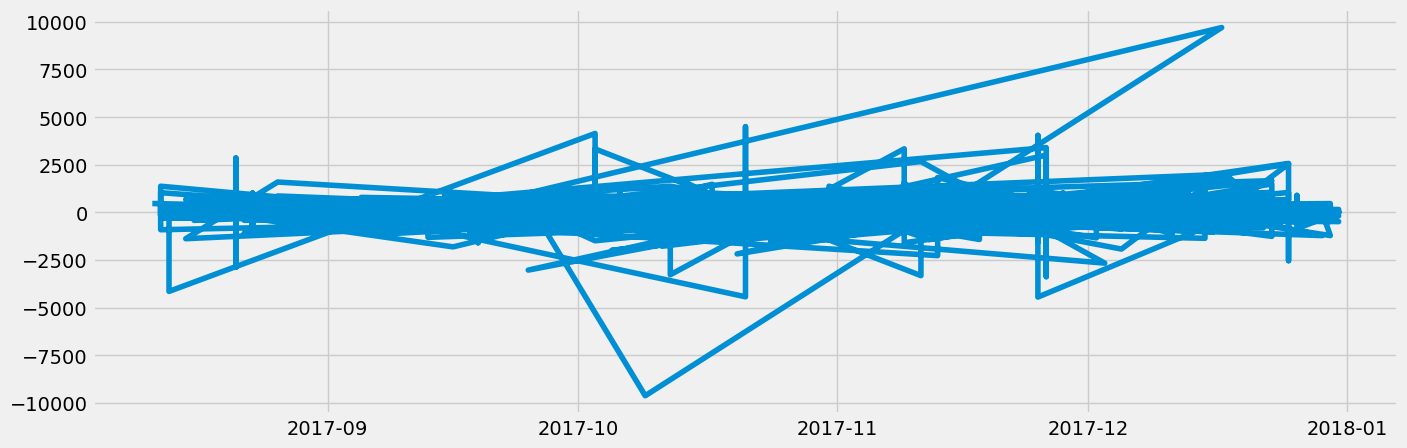

In [42]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [43]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.265751e+01
p-value                        1.326833e-23
Number of Lags Used            2.100000e+01
Number of Observations Used    1.133000e+03
Critical Value (1%)           -3.436135e+00
Critical Value (5%)           -2.864094e+00
Critical Value (10%)          -2.568130e+00
dtype: float64


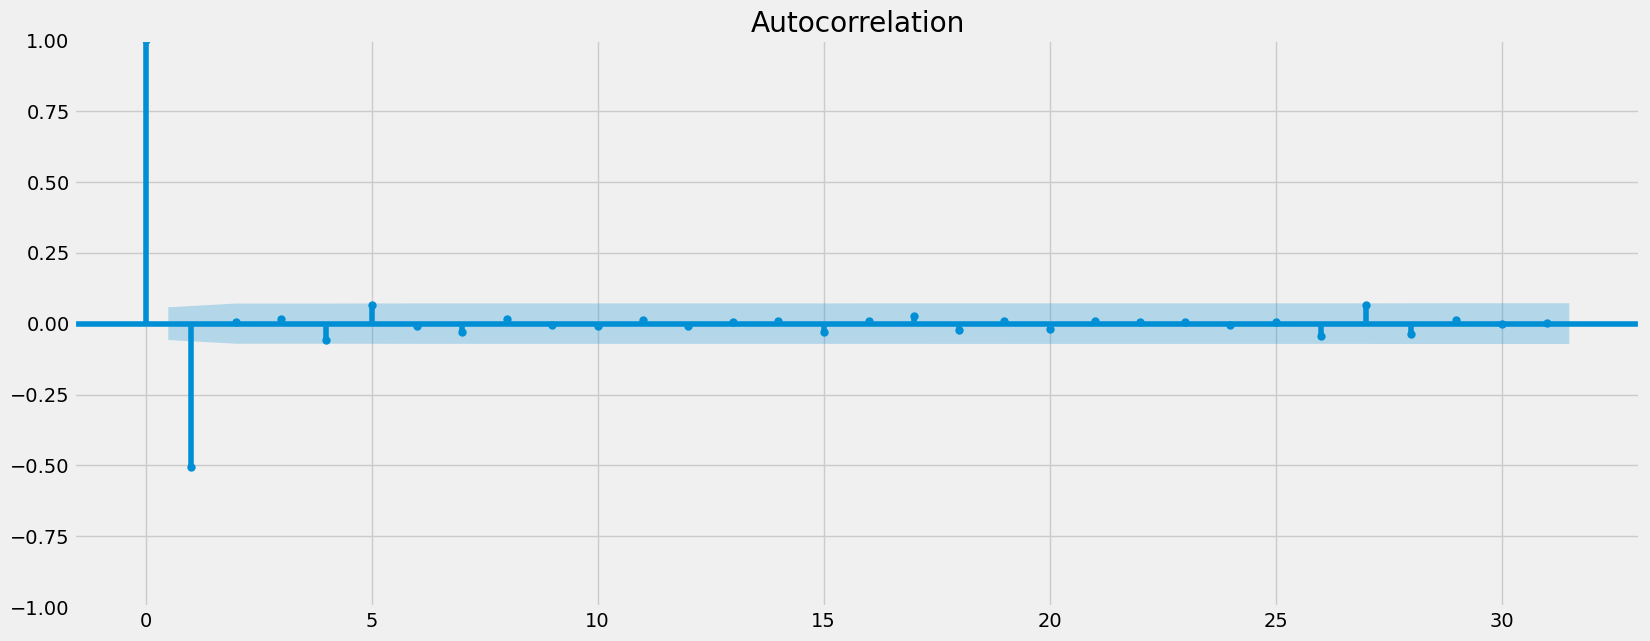

In [44]:
plot_acf(data_diff)
plt.show()